In [1]:
# !git clone https://github.com/theschoolofai/YoloV3.git

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


### Copy required folder

In [8]:
!ls

gdrive	sample_data  YoloV3  YoloV3.zip


In [5]:
!cp 'gdrive/My Drive/eva_stored_from_colab/eva5/s13_yolo/YoloV3.zip' .

In [7]:
!mkdir YoloV3

In [ ]:
!unzip YoloV3.zip -d ./YoloV3

In [11]:
!cp 'gdrive/My Drive/eva_stored_from_colab/eva5/s13_yolo/yolov3-spp-ultralytics.pt' ./YoloV3/weights

In [10]:
!ls YoloV3/

 annotation_tool   models.py	  results.png   train.py	    weights
 cfg		   output	  results.txt  'ubdivisions=1'
 data		   README.md	  test.py       utils
 detect.py	   results.json   ting	        vim.exe.stackdump


In [12]:
!ls YoloV3/weights/

yolov3-spp-ultralytics.pt


## Temo Changes

In [23]:
!ls ./data/customdata

custom.data   images  test.shapes  train.shapes
custom.names  labels  test.txt	   train.txt


In [24]:
!cp '../gdrive/My Drive/eva_stored_from_colab/eva5/s13_yolo/temp_changes/train.shapes' ./data/customdata/train.shapes

In [25]:
!cp '../gdrive/My Drive/eva_stored_from_colab/eva5/s13_yolo/temp_changes/test.shapes' ./data/customdata/test.shapes

In [ ]:
!cat ./data/customdata/test.shapes

In [13]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.6.0+cu101 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15079MB, multi_processor_count=40)


In [14]:
cd YoloV3/

/content/YoloV3


In [28]:
!python train.py --data ./data/customdata/custom.data --batch 3 --cache --epochs 3 --nosave

Namespace(accumulate=4, adam=False, batch_size=3, bucket='', cache_images=True, cfg='cfg/yolov3-spp.cfg', data='./data/customdata/custom.data', device='', epochs=3, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

2020-10-24 17:02:09.696181: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Caching labels (3034 found, 131 missing, 38 empty, 0 duplicate, for 3203 images): 100% 3203/3203 [00:00<00:00, 9646.18it/s]
Caching images (1.8GB): 100% 3203/3203 [00:19<00:00, 167.34it/s]
Caching labels (297 found, 14 missing, 7 empty, 0 duplicate, for 318 images): 100% 318/318 [00

In [26]:
# !cp -r '../YoloV3' '../gdrive/My Drive/eva_stored_from_colab/eva5/s13_yolo/yolov3_saved_24_1630/'

In [29]:
!python train.py --data data/customdata/custom.data --batch 16 --cache --cfg cfg/yolov3-custom.cfg --epochs 50

Namespace(accumulate=4, adam=False, batch_size=16, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=50, evolve=False, img_size=[512], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

2020-10-24 17:26:31.351571: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
Caching labels (3034 found, 131 missing, 38 empty, 0 duplicate, for 3203 images): 100% 3203/3203 [00:00<00:00, 8724.69it/s]
Caching images (1.8GB): 100% 3203/3203 [00:19<00:00, 167.51it/s]
Caching labels (297 found, 14 missing, 7 empty, 0 duplicate, for 318 images): 100% 318/318

In [ ]:
!cp -r '../YoloV3' '../gdrive/My Drive/eva_stored_from_colab/eva5/s13_yolo/yolov3_saved_24_2200/'  # happy

In [ ]:
!cp '../gdrive/My Drive/eva_stored_from_colab/eva5/s13_yolo/images.zip' .
!unzip images.zip -d .

In [31]:
!python detect.py --conf-thres 0.1 --output out_out --source images/

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_out', save_txt=False, source='images/', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
image 1/900 images/image-061.png: 320x512 1 vests, Done. (0.033s)
image 2/900 images/image-062.png: 320x512 1 vests, Done. (0.031s)
image 3/900 images/image-063.png: 320x512 1 hardhats, 1 vests, Done. (0.031s)
image 4/900 images/image-064.png: 320x512 1 hardhats, 1 vests, Done. (0.031s)
image 5/900 images/image-065.png: 320x512 1 hardhats, Done. (0.028s)
image 6/900 images/image-066.png: 320x512 1 vests, Done. (0.028s)
image 7/900 images/image-067.png: 320x512 1 hardhats, 1 vests, Done. (0.028s)
image 8/900 images/image-068.png: 320x512

In [35]:
!zip -r  yolo_output.zip  out_out/  

  adding: out_out/ (stored 0%)
  adding: out_out/image-120.png (deflated 9%)
  adding: out_out/image-492.png (deflated 10%)
  adding: out_out/image-646.png (deflated 6%)
  adding: out_out/image-529.png (deflated 12%)
  adding: out_out/image-441.png (deflated 10%)
  adding: out_out/image-581.png (deflated 6%)
  adding: out_out/image-830.png (deflated 13%)
  adding: out_out/image-085.png (deflated 6%)
  adding: out_out/image-184.png (deflated 10%)
  adding: out_out/image-086.png (deflated 6%)
  adding: out_out/image-390.png (deflated 9%)
  adding: out_out/image-240.png (deflated 11%)
  adding: out_out/image-806.png (deflated 12%)
  adding: out_out/image-802.png (deflated 12%)
  adding: out_out/image-697.png (deflated 6%)
  adding: out_out/image-134.png (deflated 7%)
  adding: out_out/image-785.png (deflated 8%)
  adding: out_out/image-294.png (deflated 6%)
  adding: out_out/image-673.png (deflated 6%)
  adding: out_out/image-434.png (deflated 11%)
  adding: out_out/image-596.png (deflate

In [37]:
!cp yolo_output.zip '../gdrive/My Drive/eva_stored_from_colab/eva5/s13_yolo/'

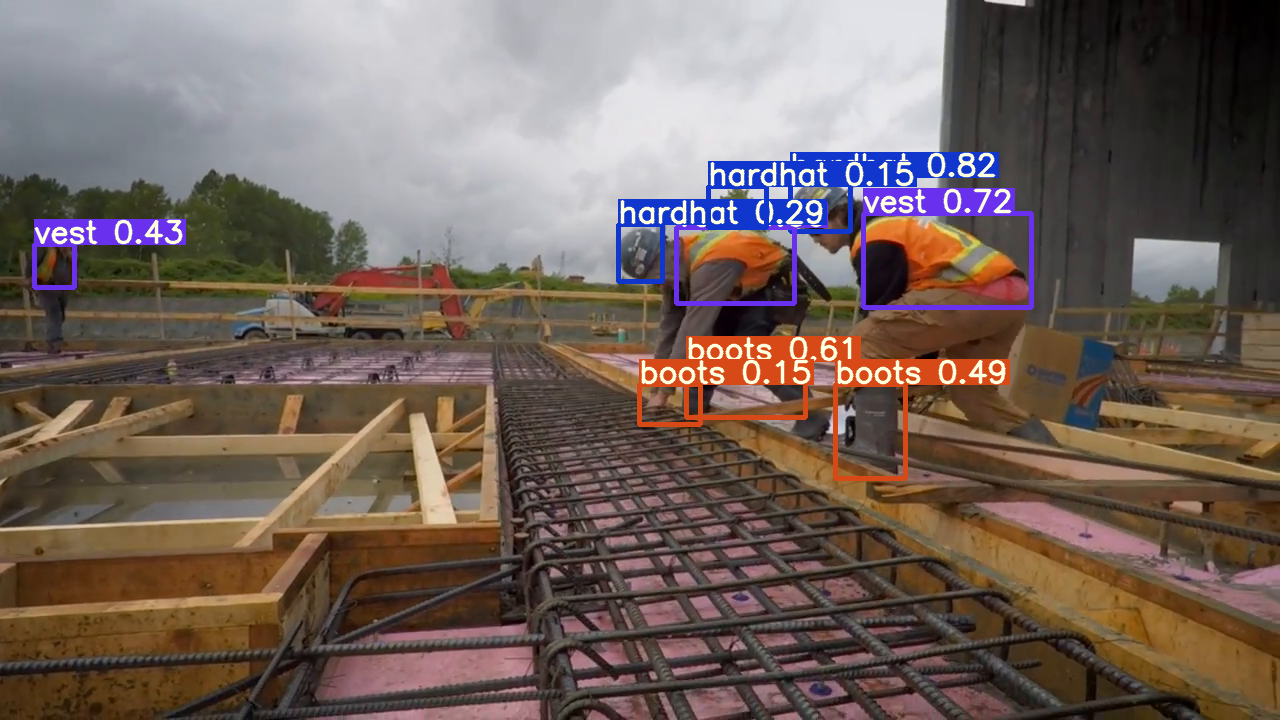

In [34]:
Image(filename='out_out/image-273.png', width=600)

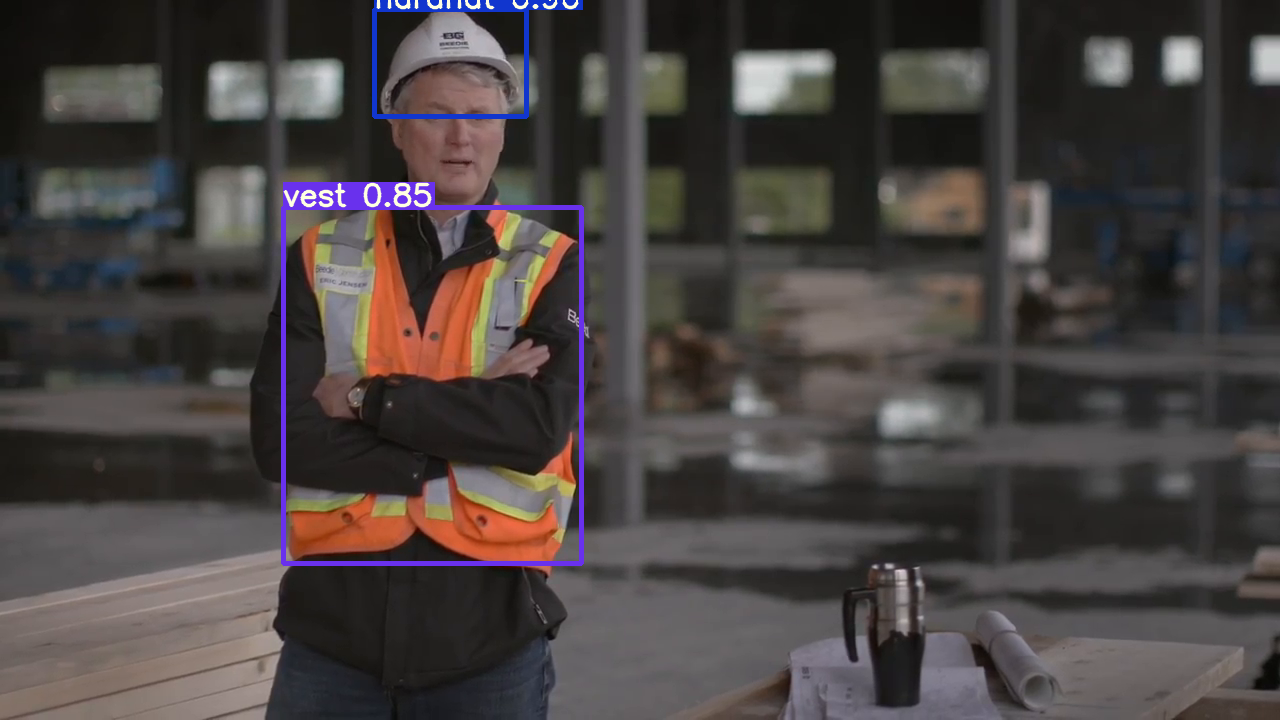

In [38]:
Image(filename='out_out/image-824.png', width=600)

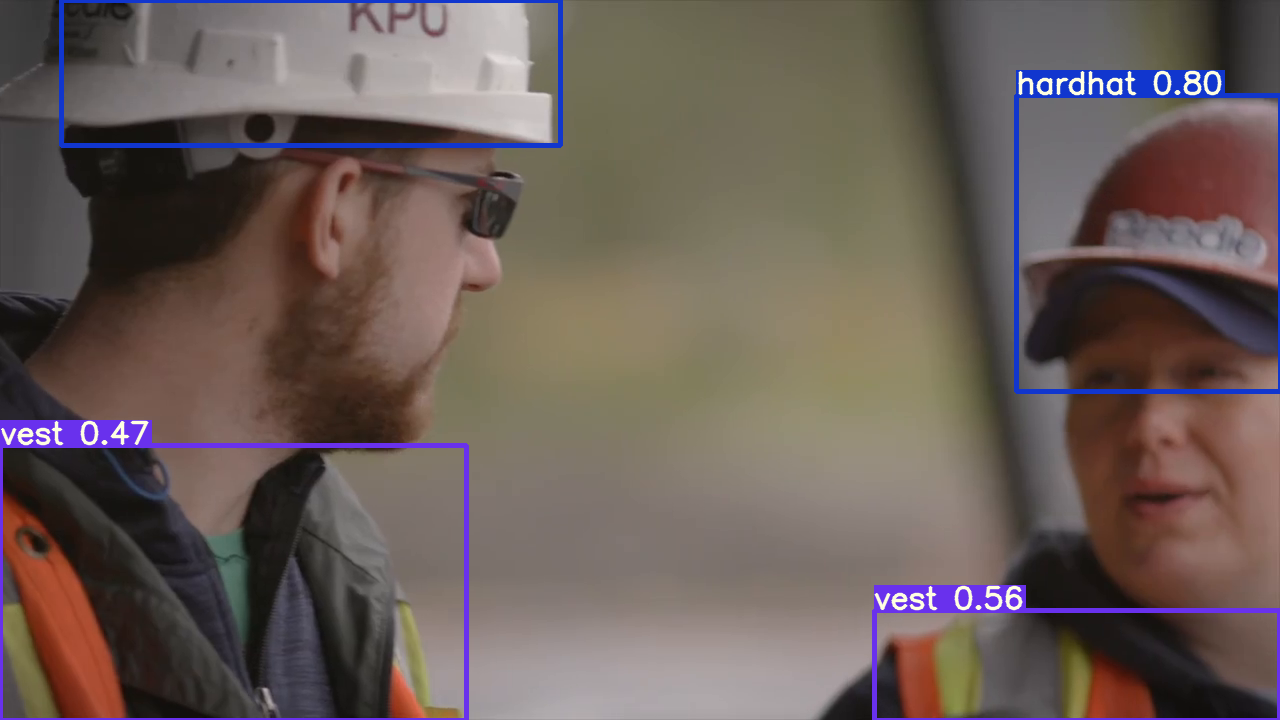

In [39]:
Image(filename='out_out/image-413.png', width=600)

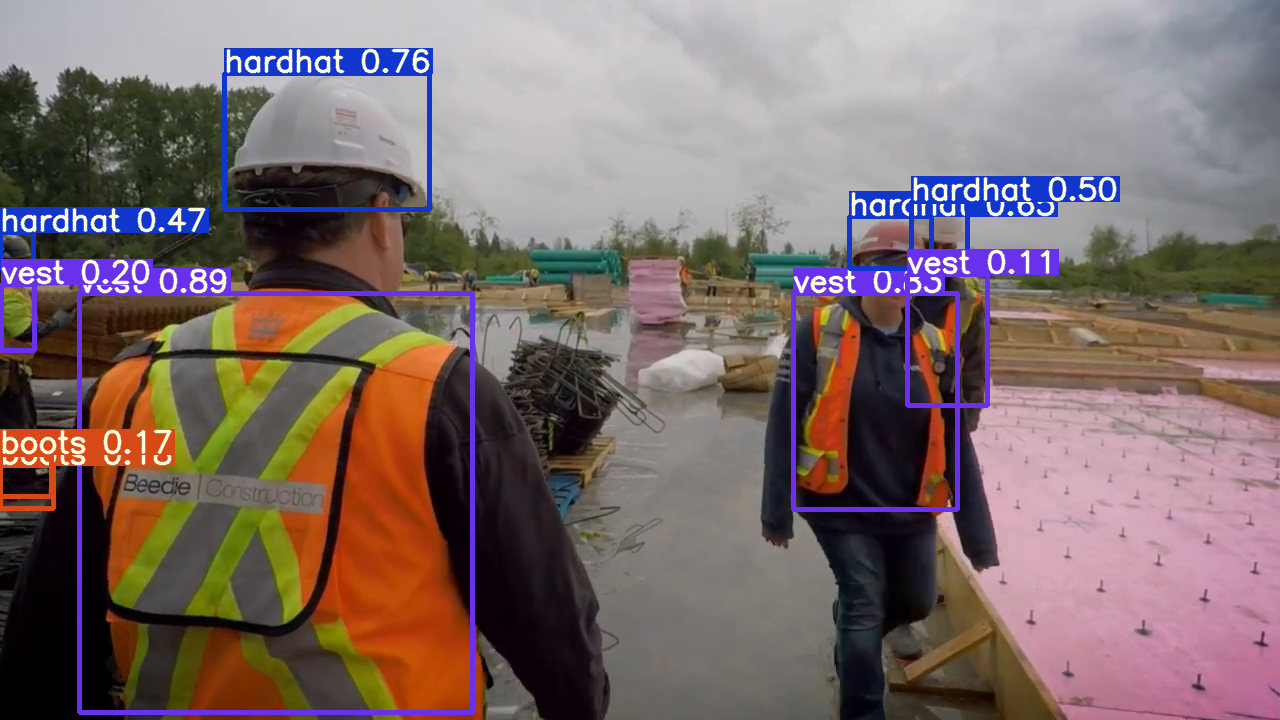

In [40]:
Image(filename='out_out/image-655.png', width=600)